In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [ ]:
# pip install tensorflow==2.0.0

In [3]:
pip install patool

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import patoolib           #First pip install patool then import the library
from imutils import paths
from tqdm import tqdm_notebook as tqdm
import cv2
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import imutils

In [5]:
# load the dataset
from google.colab import drive
drive.mount("/content/drive")      # As our files are on google drive, hence we need to mount the drive with colab. Then we can access the files on our drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!dir

drive  sample_data


In [7]:
import os
os.chdir("/content/drive/MyDrive/Deep Learning/Practice ANN/ANN 2 - Classification")

In [8]:
!dir # now we are inside the main directory and we can see the folders which we require

an_classification_practice.h5	dataset1     test_examples   test_examples.rar
ann_classification_practice.h5	dataset2     test_examples1
ANN\ practice\ model.ipynb	dataset3     test_examples2
dataset				dataset.rar  test_examples3


In [9]:
patoolib.extract_archive("dataset.rar")

patool: Extracting dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Deep Learning/Practice ANN/ANN 2 - Classification/dataset.rar"
patool:     with cwd='./Unpack_d6ptfih9'
patool: ... dataset.rar extracted to `dataset4' (local file exists).


'dataset4'

In [10]:
patoolib.extract_archive("test_examples.rar")

patool: Extracting test_examples.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Deep Learning/Practice ANN/ANN 2 - Classification/test_examples.rar"
patool:     with cwd='./Unpack_mh30czea'
patool: ... test_examples.rar extracted to `test_examples4' (local file exists).


'test_examples4'

In [11]:
!dir

an_classification_practice.h5	dataset1  dataset.rar	  test_examples3
ann_classification_practice.h5	dataset2  test_examples   test_examples4
ANN\ practice\ model.ipynb	dataset3  test_examples1  test_examples.rar
dataset				dataset4  test_examples2


In [12]:
list(paths.list_images("dataset"))[:5]

['dataset/Forest/1017.jpg',
 'dataset/Forest/1004.jpg',
 'dataset/Forest/1024.jpg',
 'dataset/Forest/1025.jpg',
 'dataset/Forest/1063.jpg']

In [13]:
tic = time.time()

data = []
labels = []
classes = ["Forest", "Buildings"]

imagepaths = list(paths.list_images("dataset"))
random.seed(50)
random.shuffle(imagepaths)

with tqdm(total = len(imagepaths)) as pbar:

    for imagepath in imagepaths:
        image = cv2.imread(imagepath)
        image = cv2.resize(image, (100,100)).flatten()
        data.append(image)

        label = imagepath.split(os.path.sep)[-2]

        label = 0 if label == "Forest" else 1
        labels.append(label)
        pbar.update(1)

data = np.array(data, dtype="float")/255.0
labels = np.array(labels)
toc = time.time()

print("Time taken {:.1f} seconds".format(toc-tic))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/883 [00:00<?, ?it/s]

Time taken 8.1 seconds


In [14]:
print("Data length",len(data)), print("Labels length",len(labels))

Data length 883
Labels length 883


(None, None)

In [15]:
print("sample image: {}".format(data[0]))
print("number of pixels: {}".format(len(data[0])))
print("label: {}".format(labels[0]))

sample image: [0.34509804 0.48235294 0.83529412 ... 0.44313725 0.62352941 0.34901961]
number of pixels: 30000
label: 0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.17, random_state=50)

print(X_train.shape, "X_train")
print(X_test.shape, "X_test")
print(y_train.shape, "y_train")
print(y_test.shape, "y_test")

(732, 30000) X_train
(151, 30000) X_test
(732,) y_train
(151,) y_test


In [17]:
X_train[1]

array([0.85490196, 0.75686275, 0.69803922, ..., 0.36078431, 0.39607843,
       0.41176471])

In [18]:
y_train[1]

1

In [19]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [20]:
y_train[1]

# [1,0] = forest
# [0,1] = building

array([0., 1.], dtype=float32)

In [21]:
sample_image = (X_train[1]*255).astype("int")

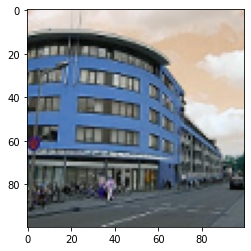

In [22]:
plt.imshow(sample_image.reshape(100,100,3))

In [23]:
y_train[1]

array([0., 1.], dtype=float32)

In [24]:
model = Sequential()

model.add(Dense(units= 8000, input_shape=(30000,), kernel_initializer="uniform", activation="relu"))

model.add(Dense(units=4000, kernel_initializer="uniform", activation="relu"))

model.add(Dense(units=1000, kernel_initializer="uniform", activation="relu"))

model.add(Dense(units=500, kernel_initializer="uniform", activation="relu"))

model.add(Dense(units=2, kernel_initializer="uniform", activation="softmax"))

In [25]:
learn_rate = 0.001
EPOCHS = 50

opt = SGD(learning_rate=learn_rate)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8000)              240008000 
_________________________________________________________________
dense_1 (Dense)              (None, 4000)              32004000  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              4001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1002      
Total params: 276,514,502
Trainable params: 276,514,502
Non-trainable params: 0
_________________________________________________________________


In [27]:
tic = time.time()
training = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs = EPOCHS, batch_size=120)
toc = time.time()
print("time taken: {:.1f} seconds".format(toc-tic))

Train on 732 samples, validate on 151 samples
Epoch 1/50
732/732 [==============================] - 23s 32ms/sample - loss: 1.1551 - accuracy: 0.5669 - val_loss: 0.7547 - val_accuracy: 0.5232
Epoch 2/50
732/732 [==============================] - 22s 30ms/sample - loss: 0.7646 - accuracy: 0.5956 - val_loss: 0.6258 - val_accuracy: 0.6623
Epoch 3/50
732/732 [==============================] - 22s 29ms/sample - loss: 0.5144 - accuracy: 0.7336 - val_loss: 0.6790 - val_accuracy: 0.6887
Epoch 4/50
732/732 [==============================] - 23s 31ms/sample - loss: 0.6507 - accuracy: 0.6653 - val_loss: 0.7359 - val_accuracy: 0.6225
Epoch 5/50
732/732 [==============================] - 21s 29ms/sample - loss: 0.5062 - accuracy: 0.7377 - val_loss: 0.9086 - val_accuracy: 0.6093
Epoch 6/50
732/732 [==============================] - 21s 29ms/sample - loss: 0.5435 - accuracy: 0.7445 - val_loss: 0.5842 - val_accuracy: 0.7417
Epoch 7/50
732/732 [==============================] - 21s 29ms/sample - loss: 

In [28]:
pred_prob = model.predict(X_test)

In [ ]:
pred_prob

In [30]:
y_test = [np.argmax(i) for i in y_test]
y_pred = [np.argmax(i) for i in pred_prob]

In [ ]:
y_pred

In [35]:
cm = confusion_matrix(y_test, y_pred)

In [36]:
cm

array([[57,  7],
       [26, 61]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78        64
           1       0.90      0.70      0.79        87

    accuracy                           0.78       151
   macro avg       0.79      0.80      0.78       151
weighted avg       0.81      0.78      0.78       151



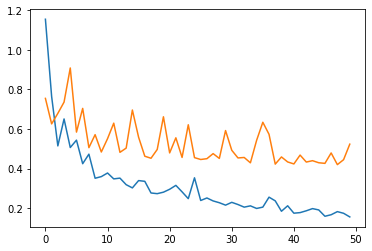

In [38]:
N = np.arange(0, EPOCHS)
plt.plot(N, training.history["loss"], label="train_loss")
plt.plot(N, training.history["val_loss"], label = "val_loss")
plt.show()

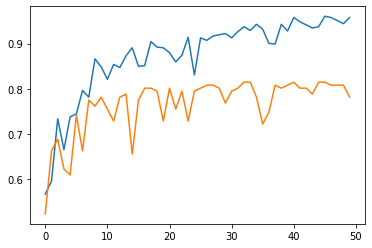

In [39]:
N = np.arange(0, EPOCHS)
plt.plot(N, training.history["accuracy"], label="train_loss")
plt.plot(N, training.history["val_accuracy"], label = "val_loss")
plt.show()

In [40]:
model.save("ann_classification_practice.h5")

In [41]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [42]:
# load the input image and resize it to the target spatial dimensions
width = 100
height = 100

# grab the image paths and randomly shuffle them
testImagePaths = sorted(list(paths.list_images('test_examples')))   # test data folder with random images


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        image = cv2.imread(imagePath)
        output = image.copy()
        image = cv2.resize(image, (width, height))

        # scale the pixel values to [0, 1]
        image = image.astype("float") / 255.0

        # for a simple fully-connected network, flatten the image
        image = image.flatten()
        image = image.reshape((1, image.shape[0]))


        # make a prediction on the image
        preds = model.predict(image)

        # find the class label index with the largest corresponding probability
        i = preds.argmax(axis=1)[0]
        label = classes[i]
        
        label = "{}: {:.2f}%".format(label, preds[0][i] * 100)

        
        output = imutils.resize(output, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 255, 0), 2)
        
        # convert img to rgb format and display in noteboo
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

#         print("############################")
#         print("image: {}".format(os.path.split(imagePath)[-1]))
#         print("predicted label: {}".format(label))
#         print("Confidence: {}".format(preds[0][i]))
        
        pbar.update(1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install gradio

In [44]:
import gradio as gr

In [45]:
def predict_image(image):
    
    image = cv2.resize(image, (100, 100))

    # scale the pixel values to [0, 1]
    image = image.astype("float") / 255.0

    # for a simple fully-connected network, flatten the image
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))

    # make a prediction on the image
    preds = model.predict(image).flatten()
    result = dict()
    result["Forest"] = round(float(list(preds)[0]), 3)
    result["Buildings"] = round(float(list(preds)[1]), 3)
    print(result)
    
    return result

im = gr.inputs.Image(shape=(100,100))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="ANN Demo").launch(share=True)

/usr/local/lib/python3.7/dist-packages/gradio/interface.py:231: UserWarning: The `capture_session` parameter in the `Interface` is deprecated and may be removed in the future.
  "The `capture_session` parameter in the `Interface`"


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://24518.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f83ce4f1790>,
 'http://127.0.0.1:7860/',
 'https://24518.gradio.app')